# This dataset has passenger information who boarded the Titanic along with other information like survival status, Class, Fare, and other variables. The unfortunate event which was occurred on 15 April 1912, the Titanic sank after colliding with an iceberg.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

Here we have 891 rows and 12 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

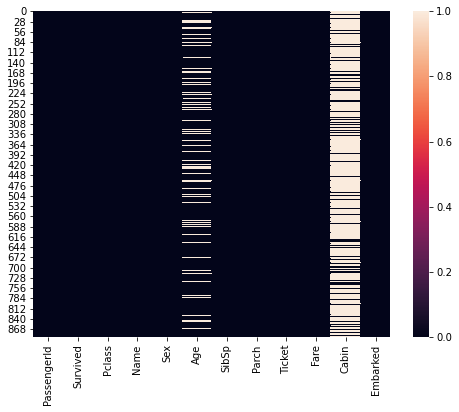

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())
plt.show()

As we can clearly visualize from the above Heatmap, that there is null value in Age and Cabin

#  Droping some of the columns which many not contribute much to our machine learning model such as Name, Ticket, Cabin etc

In [9]:
df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Now lets fill the missing values

In [14]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode)

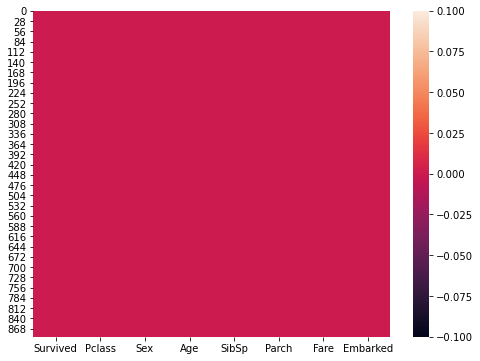

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())
plt.show()

All the missing values are filled

In [17]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We will Check skewness and outliers in further steps

<AxesSubplot:>

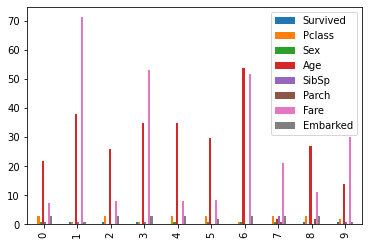

In [113]:
df[:10].plot.bar()

<AxesSubplot:xlabel='Survived', ylabel='count'>

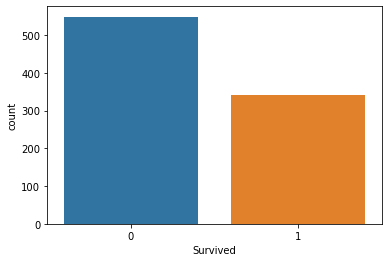

In [23]:
sns.countplot(x="Survived",data=df)

Above Visualization Shows that data is not imbalanced

In [24]:
df["Survived"].unique()

array([0, 1], dtype=int64)

In [28]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Bi-Variate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

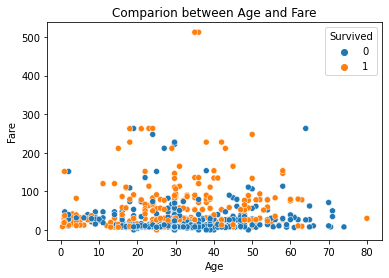

In [18]:
sns.scatterplot(x="Age",y="Fare",data=df,hue="Survived")
plt.title("Comparion between Age and Fare")
plt.show

Above visualization shows us that, age between 10-60 has similar fare

In [111]:
df[["Survived","Age"]]

,Survived,Age
0,0,22.000000
1,1,38.000000
2,1,26.000000
3,1,35.000000
4,0,35.000000
...,...,...
886,0,27.000000
887,1,19.000000
888,0,29.699118
889,1,26.000000


In [115]:
Surviveddf=df["Survived"]== 0
Agedf=df["Age"]==27
df[Surviveddf & Agedf]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
41,0,2,0,27.0,1,0,21.0000,3
221,0,2,1,27.0,0,0,13.0000,3
321,0,3,1,27.0,0,0,7.8958,3
377,0,1,1,27.0,0,2,211.5000,1
551,0,2,1,27.0,0,0,26.0000,3
620,0,3,1,27.0,1,0,14.4542,1
886,0,2,1,27.0,0,0,13.0000,3


In [117]:
Surviveddf=df["Survived"]== 1
Agedf=df["Age"]==27
df[Surviveddf & Agedf]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
8,1,3,0,27.0,0,2,11.1333,3
146,1,3,1,27.0,0,0,7.7958,3
216,1,3,0,27.0,0,0,7.9250,3
607,1,1,1,27.0,0,0,30.5000,3
681,1,1,1,27.0,0,0,76.7292,1
717,1,2,0,27.0,0,0,10.5000,3
724,1,1,1,27.0,1,0,53.1000,3
804,1,3,1,27.0,0,0,6.9750,3
821,1,3,1,27.0,0,0,8.6625,3
823,1,3,0,27.0,0,1,12.4750,3


# Uni-variate Analysis

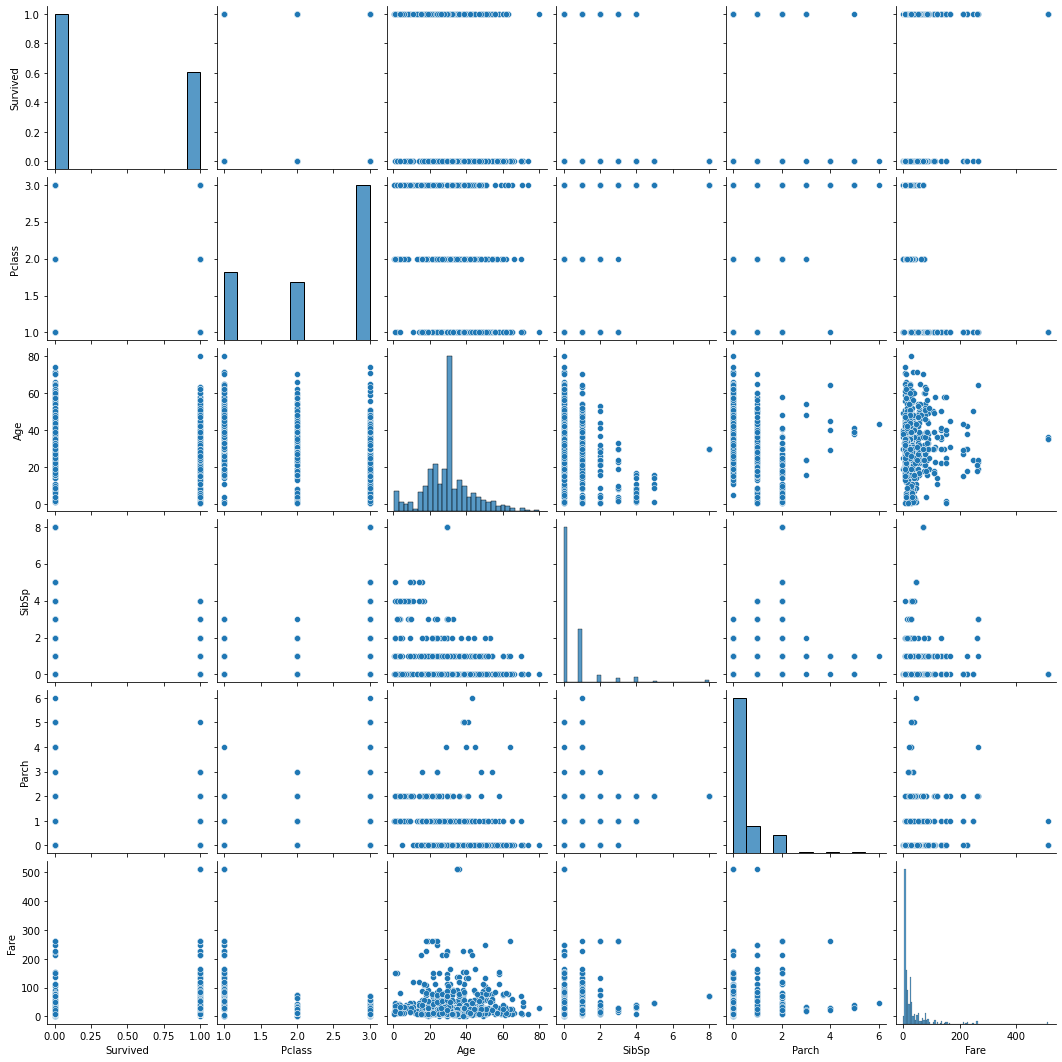

In [19]:
sns.pairplot(df)

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=["Sex","Embarked"]
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

# Checking Correlation

In [34]:
cor=df.corr()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.176509
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.173511
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.118492
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.039610
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.071480
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.043351
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.230365
Embarked,-0.176509,0.173511,0.118492,-0.039610,0.071480,0.043351,-0.230365,1.000000


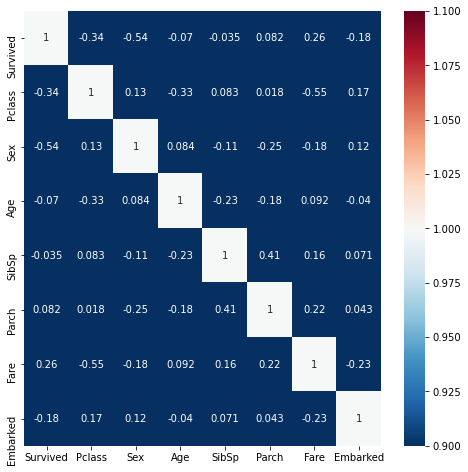

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(cor,annot=True,linewidths=0,vmin=1,cmap="RdBu_r")
plt.show()

In [36]:
cor["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Embarked   -0.176509
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

# Checking Outliers

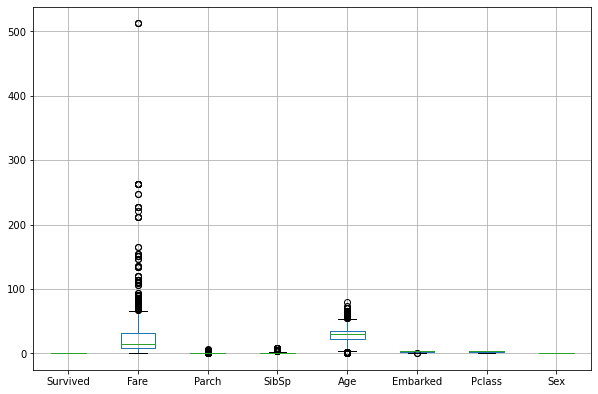

In [37]:
plt.figure(figsize=(10,8))
df[["Survived","Fare","Parch","SibSp","Age","Embarked","Pclass","Sex"]].boxplot(figsize=(10,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

# Sruvived VS Fare 

[Text(0.5, 0, 'Survived dataset'),
 Text(0, 0.5, 'Fare dataset'),
 Text(0.5, 1.0, 'Fare present in different dataset Survived types')]

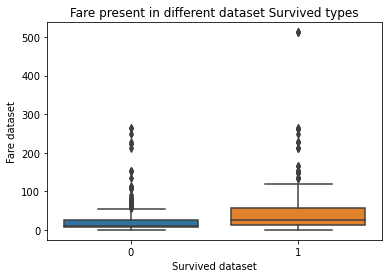

In [39]:
bx=sns.boxplot(x="Survived",y="Fare",data=df)
bx.set(xlabel="Survived dataset",ylabel="Fare dataset",title="Fare present in different dataset Survived types")

# Survived Vs Age

[Text(0.5, 0, 'Survived dataset'),
 Text(0, 0.5, 'Fare dataset'),
 Text(0.5, 1.0, 'Fare present in different dataset Survived types')]

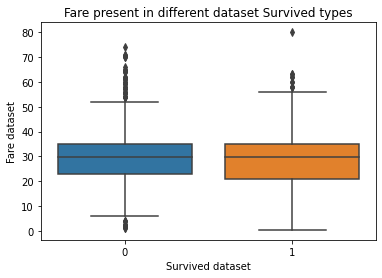

In [40]:
bx=sns.boxplot(x="Survived",y="Age",data=df)
bx.set(xlabel="Survived dataset",ylabel="Age dataset",title="Age present in different dataset Survived types")

# Checking Skewness

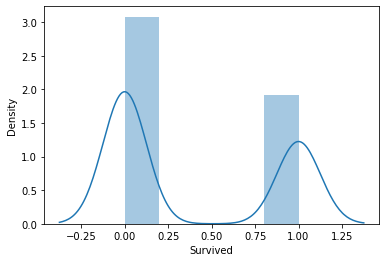

In [44]:
sns.distplot(df["Survived"])
plt.show()

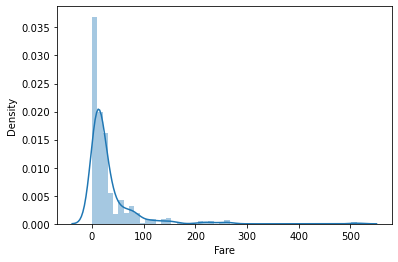

In [45]:
sns.distplot(df["Fare"])
plt.show()

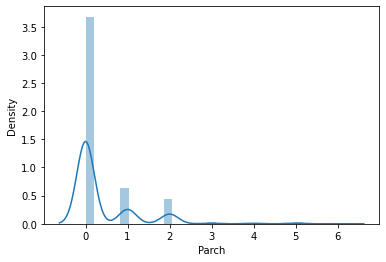

In [46]:
sns.distplot(df["Parch"])
plt.show()

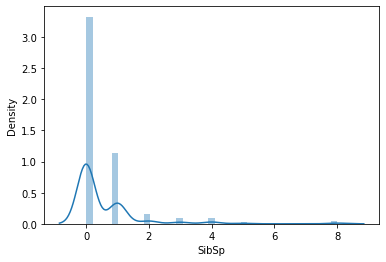

In [49]:
sns.distplot(df["SibSp"])
plt.show()

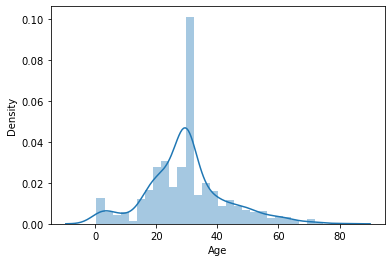

In [50]:
sns.distplot(df["Age"])
plt.show()

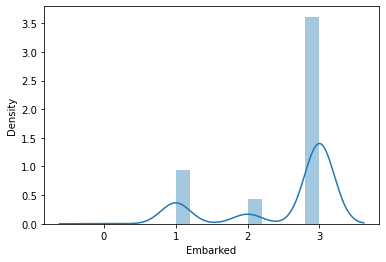

In [51]:
sns.distplot(df["Embarked"])
plt.show()

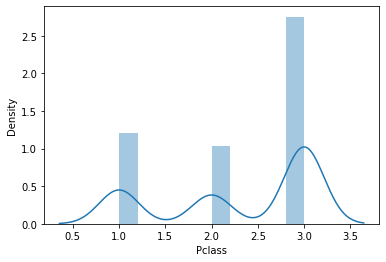

In [42]:
sns.distplot(df["Pclass"])
plt.show()

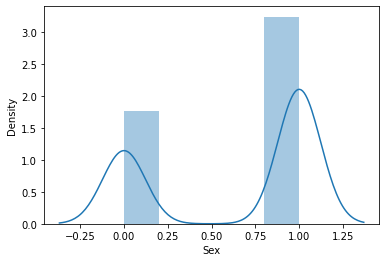

In [43]:
sns.distplot(df["Sex"])
plt.show()

In [52]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [53]:
x.skew()

Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.270634
dtype: float64

# Data Cleansing

In [54]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
#Removing Outliers using IQR method
df_new=df[~((df < (Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]

In [56]:
df_new.shape

(577, 8)

In [57]:
loss_percentage=(891-577)/891*100
print(loss_percentage)

35.24130190796858


In [58]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.50244517,
        0.58796609],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.47367361, 0.78684529,
        1.91264387],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.47367361, 0.48885426,
        0.58796609],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 2.00893337, 0.17626324,
        0.58796609],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.47367361, 0.04438104,
        1.91264387],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.49237783,
        0.66233889]])

In [59]:
thresold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  61,  68,  71,  86,  88,  96, 116,
       118, 119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266,
       278, 299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480,
       493, 527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683,
       686, 689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792,
       813, 824, 829, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 7, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4,
       4, 6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6,
       5, 5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4,
       4, 7, 4, 4, 3, 5, 4, 5], dtype=int64))


In [60]:
df_new1=df[(z<3).all(axis=1)]

In [61]:
df_new1.shape

(818, 8)

In [62]:
loss_percentage=(891-818)/891*100
print(loss_percentage)

8.19304152637486


As the data loss is less than 10% let remove it by zscore only

In [63]:
df_new1.skew()

Survived    0.457268
Pclass     -0.639191
Sex        -0.671699
Age         0.311150
SibSp       1.975774
Parch       2.118544
Fare        2.342849
Embarked   -1.273629
dtype: float64

In [69]:
from sklearn.preprocessing import power_transform
df_new1=power_transform(x)
df_new1=pd.DataFrame(df_new1,columns=x.columns)

In [70]:
df_new1.skew()

Pclass     -0.441438
Sex        -0.618921
Age         0.064420
SibSp       0.808608
Parch       1.228795
Fare       -0.040329
Embarked   -1.038983
dtype: float64

In [78]:
df_new1["Parch"]=np.sqrt(df_new1["Parch"])
df_new1["cEmbarked"]=np.log(df_new1["Embarked"])

# Finding The Best Random State

In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
maxAucc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=i)
    le=LogisticRegression()
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAucc:
        maxAucc=acc
        maxRS=i
print("Best Accuracy is ",maxAucc,"on random_state",maxRS)

Best Accuracy is  0.8634146341463415 on random_state 6


# Creating train test split

In [81]:
x_train,y_train,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=6)

In [82]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.5560975609756098
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       132
           1       0.38      0.38      0.38        73

    accuracy                           0.56       205
   macro avg       0.52      0.52      0.52       205
weighted avg       0.56      0.56      0.56       205

[[86 46]
 [45 28]]


In [83]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.5463414634146342
              precision    recall  f1-score   support

           0       0.66      0.61      0.64       132
           1       0.38      0.42      0.40        73

    accuracy                           0.55       205
   macro avg       0.52      0.52      0.52       205
weighted avg       0.56      0.55      0.55       205

[[81 51]
 [42 31]]


In [84]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.5463414634146342
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       132
           1       0.38      0.41      0.39        73

    accuracy                           0.55       205
   macro avg       0.52      0.52      0.52       205
weighted avg       0.56      0.55      0.55       205

[[82 50]
 [43 30]]


In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.5170731707317073
[[81 51]
 [48 25]]
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       132
           1       0.33      0.34      0.34        73

    accuracy                           0.52       205
   macro avg       0.48      0.48      0.48       205
weighted avg       0.52      0.52      0.52       205



In [88]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.5609756097560976
[[86 46]
 [44 29]]
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       132
           1       0.39      0.40      0.39        73

    accuracy                           0.56       205
   macro avg       0.52      0.52      0.52       205
weighted avg       0.56      0.56      0.56       205



In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
scr=cross_val_score(lr,x,y,cv=5)
print("Cross validation Score of LogisticRegression",scr.mean())

Cross validation Score of Logistic Regression 0.786761659657272


In [91]:
scr=cross_val_score(dtc,x,y,cv=5)
print("Cross validation Score of DecisionTreeClassifier",scr.mean())

Cross validation Score of DecisionTreeClassifier 0.7688406251961585


In [93]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation Score of RandomForestClassifier",scr.mean())

Cross validation Score of RandomForestClassifier 0.804758018956751


In [94]:
scr=cross_val_score(knn,x,y,cv=5)
print("Cross validation Score of KNeighborsClassifier",scr.mean())

Cross validation Score of KNeighborsClassifier 0.698141987320319


In [95]:
scr=cross_val_score(ad,x,y,cv=5)
print("Cross validation Score of AdaboostClassifier",scr.mean())

Cross validation Score of AdaboostClassifier 0.8002699140041429


Here the least difference is in KNeighbors Classifier, So we can Do Hyper Tuning with KNN

# Hyper Tuning With Kneighbors Classifier

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
#creating parameter list to pass in GridSearchCV

parameters={"n_neighbors":(1,2,3,4,5,6,7,8,9),
           "algorithm":["auto","ball_tree","kd_tree","brute"]}

In [101]:
GCV=GridSearchCV(KNeighborsClassifier(),parameters,cv=5) 

In [102]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': (1, 2, 3, 4, 5, 6, 7, 8, 9)})

In [103]:
GCV.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 3}

In [107]:
kn_mod=KNeighborsClassifier(algorithm="ball_tree",n_neighbors=3)

kn_mod.fit(x_train,y_train)
pred=kn_mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

51.707317073170735
[[85 47]
 [52 21]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       132
           1       0.31      0.29      0.30        73

    accuracy                           0.52       205
   macro avg       0.46      0.47      0.46       205
weighted avg       0.51      0.52      0.51       205



# Plotting Auc Roc Curve

In [108]:
from sklearn.metrics import plot_roc_curve

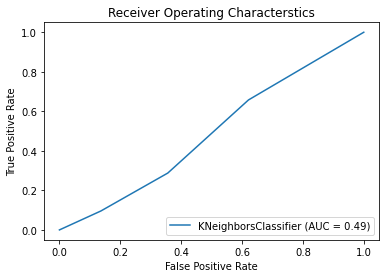

In [109]:
plot_roc_curve(kn_mod,x_test,y_test)
plt.title("Receiver Operating Characterstics")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Saving The Model

In [110]:
import joblib
joblib.dump(kn_mod,"Titanic.pkl")

['Titanic.pkl']